# 네이버 영화 평점 기준 영화의 평점 변화 확인하기

In [1]:
from bs4 import BeautifulSoup  
import pandas as pd

In [2]:
from urllib.request import urlopen

url_base = "http://movie.naver.com/"
url_syb = "movie/sdb/rank/rmovie.nhn?sel=cur&date=20170804"

page = urlopen(url_base+url_syb)

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20170804" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/

In [3]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=62586" title="다크 나이트">다크 나이트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10448" title="오즈의 마법사">오즈의 마법사</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=154437" title="내 사랑">내 사랑</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=160135" title="서서평, 천천히 평온하게">서서평, 천천히 평온하게</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=10217" title="로보캅">로보캅</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=76309" title="플립">플립</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=159054" title="명탐정 코난:진홍의 연가">명탐정 코난:진홍의 연가</a>
 </div>,
 <div class="tit5">
 <a href="/movi

In [4]:
soup.find_all('div', 'tit5')[0]

<div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=62586" title="다크 나이트">다크 나이트</a>
</div>

In [5]:
soup.find_all('div', 'tit5')[0].a

<a href="/movie/bi/mi/basic.naver?code=62586" title="다크 나이트">다크 나이트</a>

In [6]:
soup.find_all('div', 'tit5')[0].a.string

'다크 나이트'

In [7]:
soup.find_all('td', 'point')

[<td class="point">9.32</td>,
 <td class="point">9.28</td>,
 <td class="point">9.25</td>,
 <td class="point">9.23</td>,
 <td class="point">9.23</td>,
 <td class="point">9.23</td>,
 <td class="point">9.21</td>,
 <td class="point">9.20</td>,
 <td class="point">9.18</td>,
 <td class="point">9.18</td>,
 <td class="point">9.14</td>,
 <td class="point">9.10</td>,
 <td class="point">9.09</td>,
 <td class="point">9.05</td>,
 <td class="point">9.05</td>,
 <td class="point">9.02</td>,
 <td class="point">9.00</td>,
 <td class="point">8.99</td>,
 <td class="point">8.94</td>,
 <td class="point">8.93</td>,
 <td class="point">8.91</td>,
 <td class="point">8.91</td>,
 <td class="point">8.87</td>,
 <td class="point">8.86</td>,
 <td class="point">8.84</td>,
 <td class="point">8.76</td>,
 <td class="point">8.76</td>,
 <td class="point">8.74</td>,
 <td class="point">8.71</td>,
 <td class="point">8.62</td>,
 <td class="point">8.59</td>,
 <td class="point">8.58</td>,
 <td class="point">8.49</td>,
 <td class

In [8]:
len(soup.find_all('td', 'point'))

49

In [9]:
soup.find_all('td', 'point')[0].string

'9.32'

In [10]:
movie_name = [soup.find_all('div', 'tit5')[n].a.string for n in range(0, 49)]
movie_name

['다크 나이트',
 '킹 오브 프리즘 프라이드 더 히어로',
 '킹 오브 프리즘',
 '오즈의 마법사',
 '내 사랑',
 '서서평, 천천히 평온하게',
 '로보캅',
 '플립',
 '명탐정 코난:진홍의 연가',
 '헤드윅',
 '댄서',
 '이터널 선샤인',
 '샤인',
 '올드보이',
 '어네스트와 셀레스틴',
 '기쿠지로의 여름',
 '파도가 지나간 자리',
 '택시운전사',
 '눈길',
 '노무현입니다',
 '스타쉽 트루퍼스',
 '파이트 클럽',
 '청원',
 '토탈 리콜',
 '극장판 짱구는 못말려 : 습격!! 외계인 덩덩이',
 '연애담',
 '너의 이름은.',
 '슈퍼배드 3',
 '꿈의 제인',
 '심야식당2',
 '라라랜드',
 '카3: 새로운 도전',
 '오두막',
 '스파이더맨: 홈커밍',
 '옥자',
 '500일의 썸머',
 '복수는 나의 것',
 '덩케르크',
 '예수는 역사다',
 '매치 포인트',
 '7번째 내가 죽던 날',
 '위시 어폰',
 '47 미터',
 '친절한 금자씨',
 '송 투 송',
 '그 후',
 '박쥐',
 '싸이보그지만 괜찮아',
 '군함도']

In [11]:
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0, 49)]
movie_point

['9.32',
 '9.28',
 '9.25',
 '9.23',
 '9.23',
 '9.23',
 '9.21',
 '9.20',
 '9.18',
 '9.18',
 '9.14',
 '9.10',
 '9.09',
 '9.05',
 '9.05',
 '9.02',
 '9.00',
 '8.99',
 '8.94',
 '8.93',
 '8.91',
 '8.91',
 '8.87',
 '8.86',
 '8.84',
 '8.76',
 '8.76',
 '8.74',
 '8.71',
 '8.62',
 '8.59',
 '8.58',
 '8.49',
 '8.47',
 '8.47',
 '8.39',
 '8.34',
 '8.31',
 '8.14',
 '7.97',
 '7.84',
 '7.71',
 '7.40',
 '7.26',
 '7.03',
 '6.60',
 '6.09',
 '5.17',
 '4.95']

In [12]:
date = pd.date_range('2017-5-1', periods=100, freq='D')
date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [14]:
import urllib
from tqdm.notebook import tqdm

movie_date = []
movie_name = []
movie_point = []

for today in tqdm(date):
    html = "http://movie.naver.com/" + \
                                    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

  0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
len(movie_date), len(movie_name), len(movie_point)

(4723, 4723, 4723)

In [17]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 
                                      'point':movie_point})
movie.head()

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25


In [18]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


In [19]:
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [20]:
movie_unique = pd.pivot_table(movie, index = ['name'], aggfunc = sum)
movie_best = movie_unique.sort_values(by = 'point', ascending = False)
movie_best.head()

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42


In [23]:
tmp = movie[movie['name'] == "노무현입니다"]
tmp

,date,name,point
1162,2017-05-25,노무현입니다,9.20
1215,2017-05-26,노무현입니다,8.97
1255,2017-05-27,노무현입니다,9.04
1298,2017-05-28,노무현입니다,9.04
1340,2017-05-29,노무현입니다,9.05
...,...,...,...
4501,2017-08-04,노무현입니다,8.93
4549,2017-08-05,노무현입니다,8.93
4596,2017-08-06,노무현입니다,8.93
4642,2017-08-07,노무현입니다,8.93


No handles with labels found to put in legend.


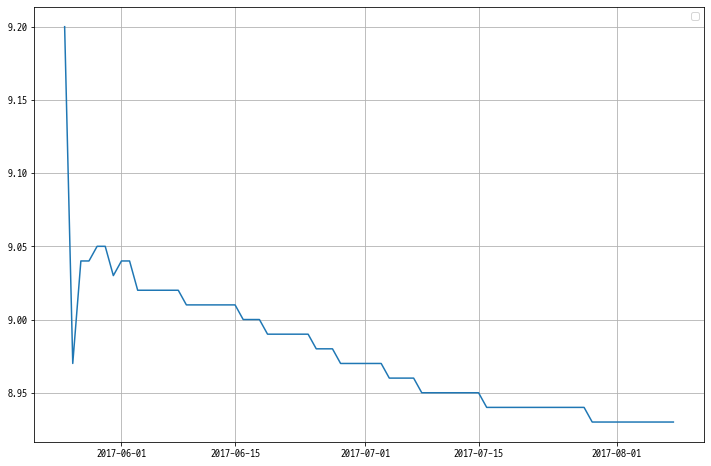

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [25]:
movie_best.head(10)

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42
노무현입니다,682.24
보스 베이비,644.21
겟 아웃,630.62
기쿠지로의 여름,613.43


In [30]:
movie_pivot = pd.pivot_table(movie, index=["date"], columns=['name'], 
                                         values=['point'])
movie_pivot.head()

point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   

                                                ...                         \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ... 하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                          
2017-05-01        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...        NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...        NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...        NaN         NaN   

                                                                                
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕 헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱 히든 피겨스  
date                                                                            
2017-05-01  8.78          8.89   NaN   8.70 NaN   NaN              9.20   9.38  
2017-05-02  8.78          8.89   NaN   8.68 NaN   NaN              9.21   9.37  
2017-05-03  8.78          8.89   NaN   8.70 NaN   NaN              9.22   9.38  
2017-05-04  8.78           NaN   NaN   8.67 NaN   NaN              9.23   9.38  
2017-05-05  8.78           NaN   NaN   8.69 NaN   NaN              9.24   9.37  

[5 rows x 204 columns]

In [31]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


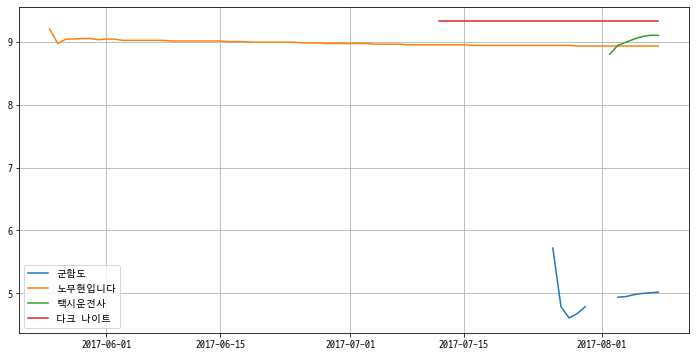

In [32]:
target_col = ['군함도', '노무현입니다', '택시운전사', '다크 나이트']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()